In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from scipy import stats
import seaborn as sns
sns.set(rc = {'figure.figsize':(17,7)})
import matplotlib.pyplot as plt

### 1

In [25]:
d = pd.read_csv("Future-500-4.csv")
d

,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,Over-Hex,Software,2006.0,25.000,TN,Franklin,9684527.000,1130700.000,8553827.000,19.000
1,Unimattax,IT Services,2009.0,36.000,PA,Newtown Square,14016543.000,804035.000,13212508.000,20.000
2,Greenfax,Retail,2012.0,28.000,SC,Greenville,9746272.000,1044375.000,8701897.000,16.000
3,Blacklane,IT Services,2011.0,66.000,CA,Orange,15359369.000,4631808.000,10727561.000,19.000
4,Yearflex,Software,2013.0,45.000,WI,Madison,8567910.000,4374841.000,4193069.000,19.000
...,...,...,...,...,...,...,...,...,...,...
487,Buretteadmirable,IT Services,2009.0,93.000,ME,Portland,15407450.000,2833136.000,12574314.000,25.000
488,Inventtremendous,Construction,2009.0,24.000,MN,Woodbury,9144857.000,4755995.000,4388862.000,11.000
489,Overviewparrot,Retail,2011.0,7125.000,TX,Fort Worth,11134728.000,5152110.000,5982618.000,12.000
490,Belaguerra,IT Services,2010.0,140.000,MI,Troy,17387130.000,1387784.000,15999346.000,23.000


### 2

In [3]:
d = d.drop(["ID"], axis = 1)
d.Revenue = d.Revenue.str.replace(r'\D+', '', regex = True)
d.Expenses = d.Expenses.str.replace(r'\D+', '', regex = True)
d.Growth = d.Growth.str.replace(r'\D+', '', regex = True)
d = d.astype({'Inception':'string',
              'Employees':'float',
              'Revenue':'float',
              'Expenses':'float',
              'Profit':'float',
              'Growth':'float',
              'Name':'string',
              'Industry':'string',
              'State':'string',
              'City':'string',})

In [4]:
d.head()

,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,Over-Hex,Software,2006.0,25.000,TN,Franklin,9684527.000,1130700.000,8553827.000,19.000
1,Unimattax,IT Services,2009.0,36.000,PA,Newtown Square,14016543.000,804035.000,13212508.000,20.000
2,Greenfax,Retail,2012.0,NaN,SC,Greenville,9746272.000,1044375.000,8701897.000,16.000
3,Blacklane,IT Services,2011.0,66.000,CA,Orange,15359369.000,4631808.000,10727561.000,19.000
4,Yearflex,Software,2013.0,45.000,WI,Madison,8567910.000,4374841.000,4193069.000,19.000


In [5]:
d.describe()

,Employees,Revenue,Expenses,Profit,Growth
count,496.000,496.000,495.000,498.000,498.000
mean,149.085,10847567.242,4315806.725,6539474.014,14.392
std,398.084,3191399.824,2115947.993,3869933.654,6.857
min,1.000,1614585.000,71219.000,12434.000,0.000
25%,27.750,8696767.250,2765292.000,3272073.750,8.000
50%,57.000,10647231.000,4365512.000,6513366.000,15.000
75%,126.000,13101110.000,5833973.000,9303950.750,20.000
max,7125.000,21810051.000,9860686.000,19624534.000,30.000


In [5]:
industries = ['Health','Financial Services','Construction','Software','IT Services','Government Services','Retail']
emp = []
rev = []
exp = []
profit = []
growth = []
for ind in industries:
    des = d[d.Industry == ind].describe().values
    emp.append([i[0] for i in des])
    rev.append([i[1] for i in des])
    exp.append([i[2] for i in des])
    profit.append([i[3] for i in des])
    growth.append([i[4] for i in des])

In [6]:
emp = np.array(emp).reshape((8, 7))
rev = np.array(rev).reshape((8, 7))
exp = np.array(exp).reshape((8, 7))
profit = np.array(profit).reshape((8, 7))
growth = np.array(growth).reshape((8, 7))

In [7]:
columns = industries
indexes = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

<AxesSubplot:title={'center':'Employees'}>

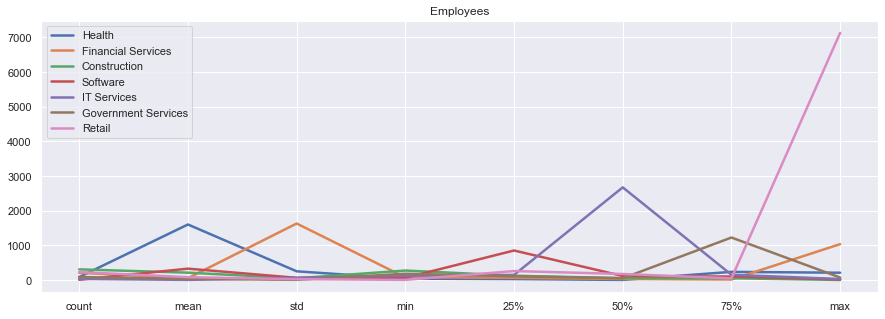

In [8]:
pd.DataFrame(data = emp, columns = columns, index = indexes).plot(figsize  = (15, 5), title = "Employees", linewidth = 2.5)

<AxesSubplot:title={'center':'Revenue'}>

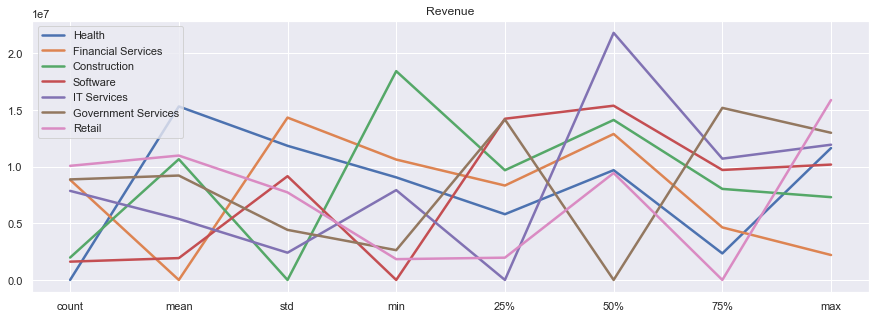

In [10]:
pd.DataFrame(data = rev, columns = columns, index = indexes).plot(figsize  = (15, 5), title = "Revenue", linewidth = 2.5)

<AxesSubplot:title={'center':'Expenses'}>

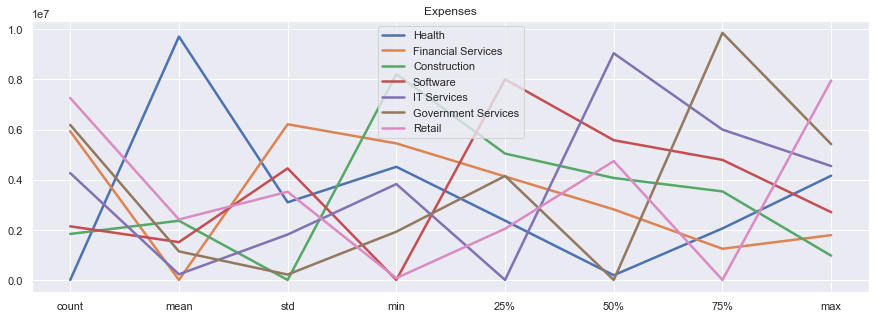

In [11]:
pd.DataFrame(data = exp, columns = columns, index = indexes).plot(figsize  = (15, 5), title = "Expenses", linewidth = 2.5)

<AxesSubplot:title={'center':'Profit'}>

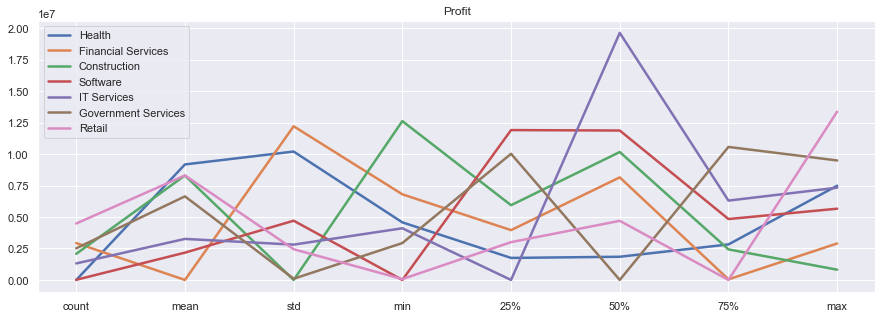

In [12]:
pd.DataFrame(data = profit, columns = columns, index = indexes).plot(figsize  = (15, 5), title = "Profit", linewidth = 2.5)

<AxesSubplot:title={'center':'Growth'}>

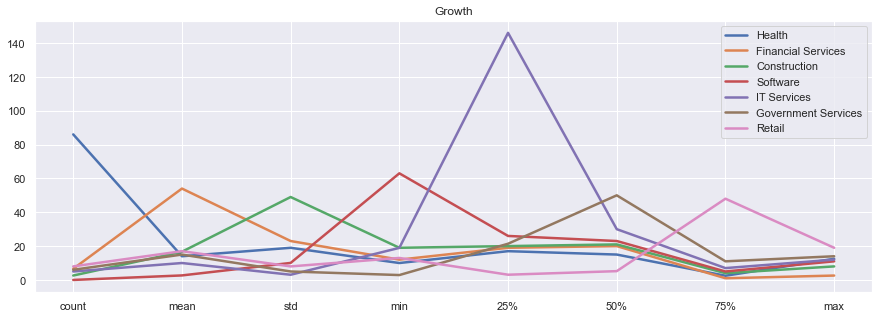

In [13]:
pd.DataFrame(data = growth, columns = columns, index = indexes).plot(figsize  = (15, 5), title = "Growth", linewidth = 2.5)

### 3

In [14]:
d.isna().sum()

Name         0
Industry     2
Inception    1
Employees    4
State        6
City         0
Revenue      4
Expenses     5
Profit       2
Growth       2
dtype: int64

Industrijos ir sukūrimo metų neįmanoma užpildyti, tad pašalinsiu

In [9]:
d = d.drop(index = d[(d.Industry.isnull()) | (d.Inception.isnull())].index, axis = 1)
d = d.reset_index(drop = True)

#### Employees

In [10]:
inter_ind_empl_dict = dict(d.groupby(['Industry'])['Employees'].median())
inter_ind_empl_dict

{'Construction': 38.0,
 'Financial Services': 80.0,
 'Government Services': 99.0,
 'Health': 85.0,
 'IT Services': 52.0,
 'Retail': 28.0,
 'Software': 62.0}

In [11]:
emp_nans = d[d.Employees.isnull()]
d.iloc[emp_nans.index, 3] = [inter_ind_empl_dict[i] for i in emp_nans.Industry]
print("Employees turi tiek NA:", d.isna().sum().Employees)

Employees turi tiek NA: 0


#### State

In [12]:
temp = d[d.State.isnull()]

NYindex = temp[temp.City == "New York"].index
d.iloc[NYindex, 4] = "NY"

NBindex = temp[temp.City == "Newport Beach"].index
d.iloc[NBindex, 4] = "CA"

ALindex = temp[temp.City == "Alpharetta"].index
d.iloc[ALindex, 4] = "GA"

SFindex = temp[temp.City == "San Francisco"].index
d.iloc[SFindex, 4] = "CA"

print("State turi tiek NA:", d.isna().sum().State)

State turi tiek NA: 0


#### Revenue, Expenses, Profit

In [13]:
d = d.drop(index = d[(d.Revenue.isnull()) & (d.Expenses.isnull())].index, axis = 1)
d = d.reset_index(drop = True)
d = d.drop(index = d[d.Growth.isnull()].index, axis = 1)
d = d.reset_index(drop = True)

In [14]:
revnan = d[d.Revenue.isnull()] 
revnan.Revenue = d.Expenses + d.Profit 
d.iloc[revnan.index, :] = revnan 

expnan = d[d.Expenses.isnull()] 
expnan.Expenses = d.Revenue - d.Profit 
d.iloc[expnan.index, :] = expnan

print("Revenue turi tiek NA:", d.isna().sum().Revenue)
print("Expenses turi tiek NA:", d.isna().sum().Expenses)
print("Profit turi tiek NA:", d.isna().sum().Profit)

Revenue turi tiek NA: 0
Expenses turi tiek NA: 0
Profit turi tiek NA: 0


C:\Users\dovyd\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Nebėra praleistų reikšmių

In [21]:
d.isna().sum()

Name         0
Industry     0
Inception    0
Employees    0
State        0
City         0
Revenue      0
Expenses     0
Profit       0
Growth       0
dtype: int64

### 4

In [15]:
dropped = 0
for col in d.columns[-4:]:
    indextodrop = d[(np.abs(stats.zscore(d[col])) >= 3)].index
    d = d = d.drop(index = indextodrop, axis = 1)
    d = d.reset_index(drop = True)
    
    dropped += len(indextodrop)

print("Pašalinta išskirčių:", dropped)

Pašalinta išskirčių: 2


### 5

In [19]:
def norm_minmax(col):
    mini = np.nanmin(col)
    maxi = np.nanmax(col)
    return (col - mini) / ( maxi - mini)

In [20]:
normd = d.copy()

colstonorm = ["Employees", "Revenue", "Expenses", "Profit", "Growth"]
for col in colstonorm:
    normd[col] = norm_minmax(normd[col])

In [21]:
normd

,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,Over-Hex,Software,2006.0,0.003,TN,Franklin,0.476,0.108,0.534,0.633
1,Unimattax,IT Services,2009.0,0.005,PA,Newtown Square,0.731,0.075,0.826,0.667
2,Greenfax,Retail,2012.0,0.004,SC,Greenville,0.480,0.099,0.544,0.533
3,Blacklane,IT Services,2011.0,0.009,CA,Orange,0.811,0.466,0.670,0.633
4,Yearflex,Software,2013.0,0.006,WI,Madison,0.410,0.440,0.262,0.633
...,...,...,...,...,...,...,...,...,...,...
487,Buretteadmirable,IT Services,2009.0,0.013,ME,Portland,0.814,0.282,0.786,0.833
488,Inventtremendous,Construction,2009.0,0.003,MN,Woodbury,0.444,0.479,0.274,0.367
489,Overviewparrot,Retail,2011.0,1.000,TX,Fort Worth,0.561,0.519,0.373,0.400
490,Belaguerra,IT Services,2010.0,0.020,MI,Troy,0.930,0.134,1.000,0.767


### 6

In [26]:
normd.corr().style.background_gradient(cmap='coolwarm')

,Employees,Revenue,Expenses,Profit,Growth
Employees,1.000000,-0.050062,0.026244,-0.055990,-0.072105
Revenue,-0.050062,1.000000,-0.007543,0.830909,0.436724
Expenses,0.026244,-0.007543,1.000000,-0.562660,-0.238084
Profit,-0.055990,0.830909,-0.562660,1.000000,0.493520
Growth,-0.072105,0.436724,-0.238084,0.493520,1.000000


<AxesSubplot:title={'center':'Total count by Industry'}, xlabel='Industry'>

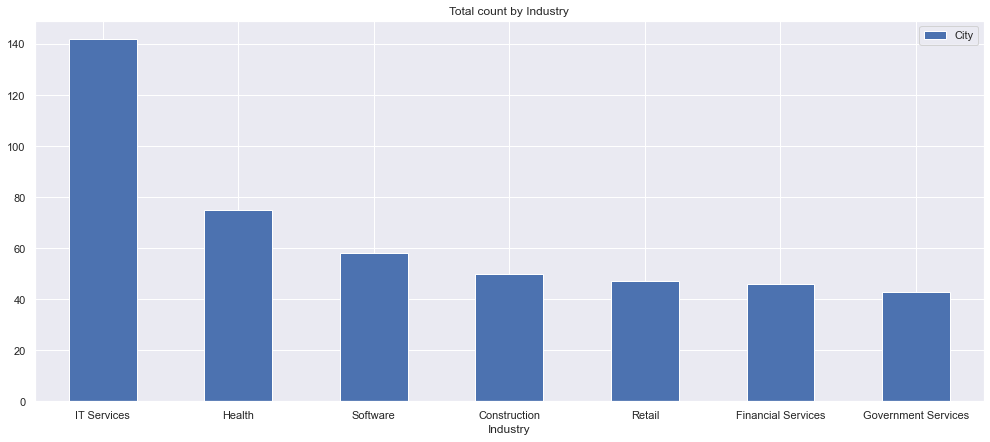

In [31]:
tempdf = pd.DataFrame(normd.groupby('Industry').City.nunique()).reset_index().sort_values(by="City", ascending = False)
tempdf.plot.bar(x = 'Industry', y = 'City', figsize = (17, 7), rot = 0, title = "Distinct city count by Industry")

In [48]:
tempdf

,Industry,City
4,IT Services,106
3,Health,71
6,Software,49
1,Financial Services,45
0,Construction,44
5,Retail,44
2,Government Services,37


<AxesSubplot:xlabel='Inception', ylabel='Count'>

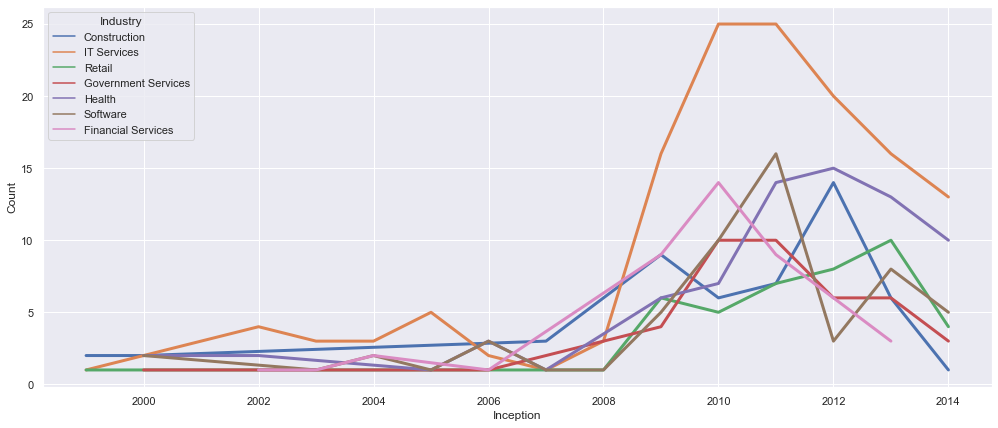

In [30]:
values = normd.groupby(['Inception', 'Industry']).Industry.count().values
cols = normd.groupby(['Inception', 'Industry']).Industry.count().index.values
tempdf = pd.DataFrame([(cols[i][0], cols[i][1], values[i]) for i in range(len(values))], columns = ['Inception', 'Industry', 'Count'])
sns.lineplot(data=tempdf,x='Inception', y = 'Count', hue='Industry', linewidth = 3)

In [29]:
normd

,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,Over-Hex,Software,2006.0,0.003,TN,Franklin,0.476,0.108,0.534,0.633
1,Unimattax,IT Services,2009.0,0.005,PA,Newtown Square,0.731,0.075,0.826,0.667
2,Greenfax,Retail,2012.0,0.004,SC,Greenville,0.480,0.099,0.544,0.533
3,Blacklane,IT Services,2011.0,0.009,CA,Orange,0.811,0.466,0.670,0.633
4,Yearflex,Software,2013.0,0.006,WI,Madison,0.410,0.440,0.262,0.633
...,...,...,...,...,...,...,...,...,...,...
487,Buretteadmirable,IT Services,2009.0,0.013,ME,Portland,0.814,0.282,0.786,0.833
488,Inventtremendous,Construction,2009.0,0.003,MN,Woodbury,0.444,0.479,0.274,0.367
489,Overviewparrot,Retail,2011.0,1.000,TX,Fort Worth,0.561,0.519,0.373,0.400
490,Belaguerra,IT Services,2010.0,0.020,MI,Troy,0.930,0.134,1.000,0.767
